In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'yes':['a','b'],'no':['c','d']})

,yes,no
0,a,c
1,b,d


In [3]:
pd.Series([30,40,50])

0    30
1    40
2    50
dtype: int64

In [4]:
df=pd.read_csv("Data_Train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [12]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [14]:
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df['Journey_Hour'] = df['Dep_Time'].dt.hour

In [17]:
df['Journey_Minute'] = df['Dep_Time'].dt.minute

In [18]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [19]:
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [20]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

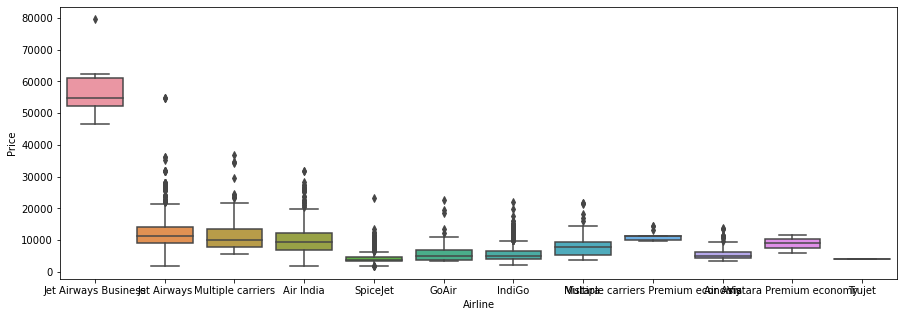

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<Figure size 1080x360 with 0 Axes>

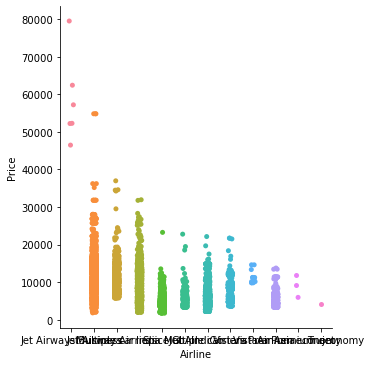

In [23]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

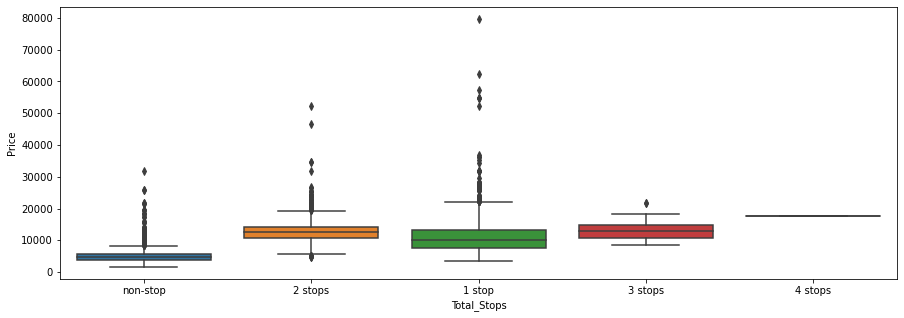

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [25]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

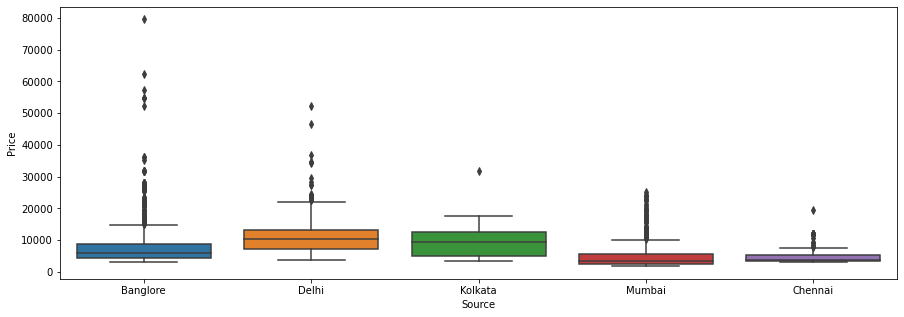

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

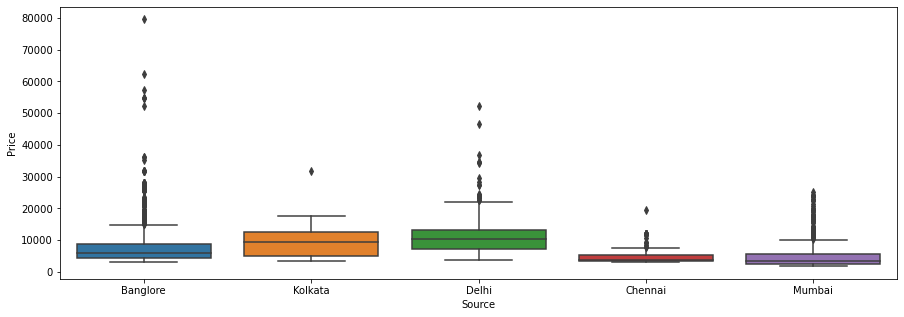

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=df)

In [28]:
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
Destination = pd.get_dummies(df['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
df.drop('Additional_Info',axis=1,inplace=True)

In [33]:
df['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [34]:
df['Route_1']=df['Route'].str.split('?').str[0]
df['Route_2']=df['Route'].str.split('?').str[1]
df['Route_3']=df['Route'].str.split('?').str[2]
df['Route_4']=df['Route'].str.split('?').str[3]
df['Route_5']=df['Route'].str.split('?').str[4]

In [35]:
df['Route_1'].fillna('none',inplace=True)
df['Route_2'].fillna('none',inplace=True)
df['Route_3'].fillna('none',inplace=True)
df['Route_4'].fillna('none',inplace=True)
df['Route_5'].fillna('none',inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder=LabelEncoder()

In [38]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i]=encoder.fit_transform(df[i])

In [39]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,0,34,8,13,5


In [40]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [42]:
df['Total_Stops']=df['Total_Stops'].map(dic)

In [43]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1,13302,3,1,16,50,21,35,0,34,8,13,5


In [44]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [45]:
df['Duration'] = duration

In [46]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [47]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[0][0:-1]
    

In [48]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)

In [49]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [50]:
df.drop('Duration',axis=1,inplace=True)

In [51]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_Day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Route_5                    int32
Duration_hours            object
Duration_mins             object
dtype: object

In [52]:
print(Source)

       Chennai  Delhi  Kolkata  Mumbai
0            0      0        0       0
1            0      0        1       0
2            0      1        0       0
3            0      0        1       0
4            0      0        0       0
...        ...    ...      ...     ...
10678        0      0        1       0
10679        0      0        1       0
10680        0      0        0       0
10681        0      0        0       0
10682        0      1        0       0

[10682 rows x 4 columns]


In [53]:
print(Destination)

       Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0           0      0          0        0          1
1           0      0          0        0          0
2           1      0          0        0          0
3           0      0          0        0          0
4           0      0          0        0          1
...       ...    ...        ...      ...        ...
10678       0      0          0        0          0
10679       0      0          0        0          0
10680       0      1          0        0          0
10681       0      0          0        0          1
10682       1      0          0        0          0

[10682 rows x 5 columns]


In [54]:
print(duration)

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [55]:
df=pd.concat([df,Source,Airline,Destination],axis=1)

In [56]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,...,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,...,0,0,0,0,0,0,0,0,0,1


In [57]:
pd.set_option('display.max_columns',41)

In [58]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,22,20,1,10,0,13,29,13,5,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,5,50,13,15,2,25,1,3,5,7,7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,9,25,4,25,3,32,4,5,5,19,19,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,18,5,23,30,2,34,3,13,5,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,16,50,21,35,0,34,8,13,5,4,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [60]:
X=df.drop('Price',axis=1)

In [61]:
y=df['Price']

In [62]:
from sklearn.feature_selection import mutual_info_classif

In [66]:
mutual_info_classif(X,y)

array([2.1188715 , 1.06725086, 0.88126001, 1.43239726, 1.22972036,
       1.86411076, 1.583582  , 2.09052652, 2.79119059, 2.31964872,
       1.50223767, 0.76279367, 1.77562224, 1.78778562, 0.16461554,
       1.54080086, 0.88359721, 0.28187061, 0.7860462 , 0.10551375,
       0.66735673, 0.9340632 , 0.00386079, 0.57586019, 0.02071241,
       0.31144027, 0.        , 0.2179972 , 0.        , 1.52316189,
       0.39686707, 0.28591838, 0.16643232, 0.37358843])

In [67]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [74]:
from sklearn import metrics
import numpy as np

In [76]:
def model(algo):
    my_model = algo.fit(X_train,y_train)
    print('train_score',my_model.score(X_train,y_train))
    y_pred=my_model.predict(X_test)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2_score:',r2_score)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    print('Mean absolute error:',mae)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',rmse)
    sns.displot(y_test-y_pred)

In [77]:
from sklearn.linear_model import LinearRegression

train_score 0.6198051673114995
r2_score: 0.6587893023035256
Mean absolute error: 1908.5803816445095
RMSE: 2698.2415303807325


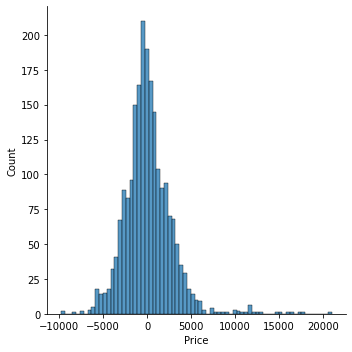

In [81]:
model(LinearRegression())

In [84]:
from sklearn.tree import DecisionTreeRegressor

train_score 0.9713420394880972
r2_score: 0.6914904100012741
Mean absolute error: 1373.4452035563875
RMSE: 2565.6879672844484


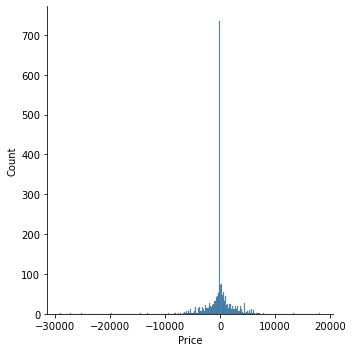

In [85]:
model(DecisionTreeRegressor())

In [86]:
from sklearn.ensemble import RandomForestRegressor

train_score 0.9536717101535529
r2_score: 0.8257844952954551
Mean absolute error: 1165.9159559566804
RMSE: 1928.0260827082614


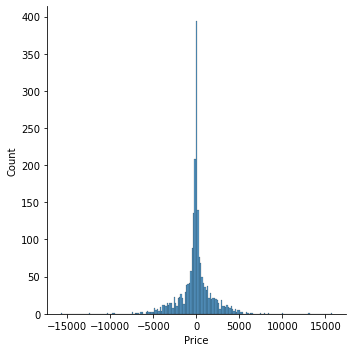

In [88]:
model(RandomForestRegressor())